Hydro inflow changes

<xarray.Dataset>
Dimensions:  (plant: 24, time: 8760)
Coordinates:
  * plant    (plant) <U17 'Julius Nyerere' 'Rusumo' ... 'Andoya' 'Tulia'
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
Data variables:
    inflow   (plant, time) float64 ...
Frozen({'plant': <xarray.IndexVariable 'plant' (plant: 24)>
array(['Julius Nyerere', 'Rusumo', 'Kikonge', 'Ruhudji', 'Mwenga',
       'Songwe Manolo', 'Songwe Sofre', 'Taveta', 'Kakono', 'Malagaresi',
       'Masigira', 'Songwe Bipungu', 'Rumakali', 'Ikondo', 'Mpanga (Tanzania)',
       'Iringa Nginayo', 'Iringa Ibosa', 'Upper Kihansi', 'Uwemba', 'Yovi',
       'Matembwe', 'Darakuta', 'Andoya', 'Tulia'], dtype='<U17'), 'time': <xarray.IndexVariable 'time' (time: 8760)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T01:00:00.000000000',
       '2013-01-01T02:00:00.000000000', ..., '2013-12-31T21:00:00.000000000',
       '2013-12-31T22:00:00.000000000', '2013-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]'), 'infl

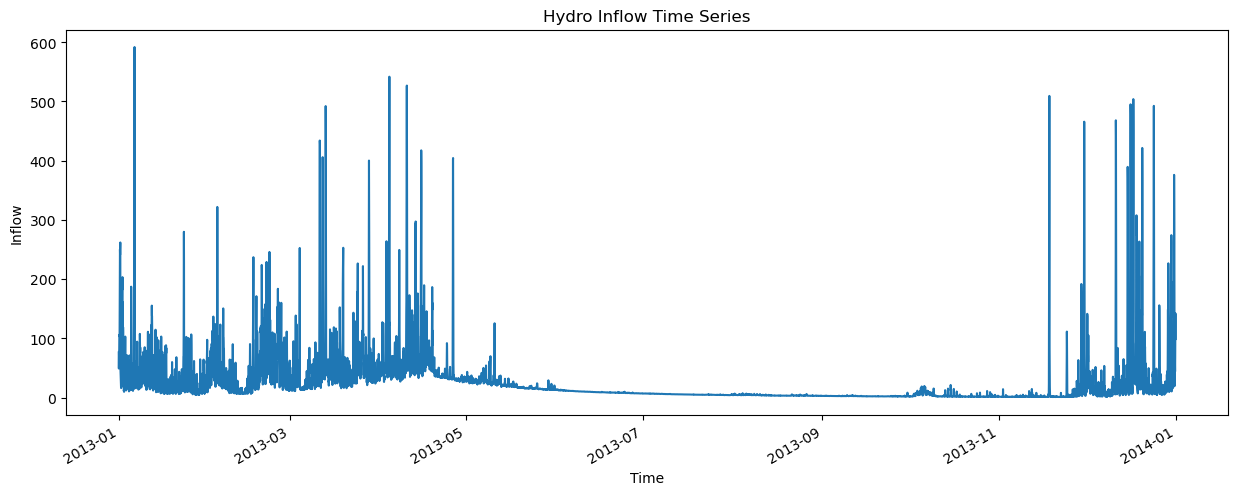

In [ ]:
import xarray as xr

# Load the NetCDF file
hydro_profile = xr.open_dataset('C:/Users/hie/pe_tan/pypsa-earth/resources/renewable_profiles/profile_hydro.nc')

# Display the structure of the dataset
print(hydro_profile)

# Display the variables in the dataset
print(hydro_profile.variables)

# Display the data for a specific variable (e.g., "inflow")
if "inflow" in hydro_profile:
    print(hydro_profile["inflow"])


import matplotlib.pyplot as plt

# Plot the inflow time series for a specific location (if applicable)
if "inflow" in hydro_profile:
    hydro_profile["inflow"].isel(plant=0).plot(figsize=(15, 5))  # Replace "bus=0" with the appropriate dimension
    plt.title("Hydro Inflow Time Series")
    plt.ylabel("Inflow")
    plt.xlabel("Time")
    plt.show()


import pandas as pd

# Convert the NetCDF dataset to a pandas DataFrame
hydro_df = hydro_profile.to_dataframe()

# Save the DataFrame to an Excel file
hydro_df.to_excel('C:/Users/hie/pe_tan/pypsa-earth/resources/renewable_profiles/profile_hydro.xlsx')

    #print("Hydro profile has been saved to Excel.")